In [24]:
from pprint import pprint
from typing import cast
from pathlib import Path
from one.api import ONE, OneAlyx

## Prepare user credentials
Your need provide your username and password to access the Alyx database.

In [2]:
USER_NAME = "HuYang"
PASSWORD = "cogp"

## Link to the Alyx database

In [3]:
one: OneAlyx = cast(OneAlyx, ONE(username=USER_NAME, password=PASSWORD, mode="remote"))

Connected to http://172.16.102.30:8000 as user "HuYang"


## Prepare the experimental folder

In [4]:
ROOT_EXPERIMENTAL_FOLDER = Path.cwd().joinpath('get_data')
pprint(ROOT_EXPERIMENTAL_FOLDER)

WindowsPath('d:/projects/collaboration/alyx/alyx_demo/get_data')


## Index the Alyx database

In [ ]:
eids, info = one.search(date_range=['2025-02-20', '2025-03-01'], details=True)
pprint(list(eids))
pprint(list(info)) # type: ignore

['a52bf0b5-4b90-479b-a3bb-e58222886784', '5da341a2-e147-4547-a301-152873fec1aa']
[{'date': datetime.date(2025, 2, 23),
  'id': 'a52bf0b5-4b90-479b-a3bb-e58222886784',
  'lab': 'CognitionPlatform',
  'number': 1,
  'projects': [],
  'start_time': '2025-02-23T20:43:58.781371',
  'subject': 'test001',
  'task_protocol': 'pacman_stage_001',
  'url': 'http://172.16.102.30:8000/sessions/a52bf0b5-4b90-479b-a3bb-e58222886784'},
 {'date': datetime.date(2025, 2, 23),
  'id': '5da341a2-e147-4547-a301-152873fec1aa',
  'lab': 'CognitionPlatform',
  'number': 1,
  'projects': [],
  'start_time': '2025-02-23T20:42:53.773830',
  'subject': 'test001',
  'task_protocol': 'pacman_stage_001',
  'url': 'http://172.16.102.30:8000/sessions/5da341a2-e147-4547-a301-152873fec1aa'}]


In [8]:
datasets = one.list_datasets(eids[1])
pprint(datasets)

['alf/mock.img.npy', 'alf/mock.signal.pqt', 'alf/mock.table.pqt']


In [9]:
import os

os.environ["AWS_ACCESS_KEY_ID"] = "u4Y2nL6jSn0OSYEK23We"
os.environ["AWS_SECRET_ACCESS_KEY"] = "NEBhmNTZNkDu5ubRwUHxEDs9hhBuuypzi5D7pLbU"
os.environ["AWS_ENDPOINT_URL"] = "http://172.16.102.77:9000"

In [23]:
file = one.load_datasets(eids[1], datasets) # type: ignore
pprint(file[1])

[{'default_revision': True,
  'eid': '5da341a2-e147-4547-a301-152873fec1aa',
  'exists': True,
  'file_size': 33554560,
  'hash': None,
  'id': 'a503e41e-da58-4c2e-bc1f-c28991738ca4',
  'qc': 'NOT_SET',
  'rel_path': 'alf/mock.img.npy',
  'revision': ''},
 {'default_revision': True,
  'eid': '5da341a2-e147-4547-a301-152873fec1aa',
  'exists': True,
  'file_size': 59187,
  'hash': None,
  'id': '6146df27-c17b-4341-b531-868a3bd7263b',
  'qc': 'NOT_SET',
  'rel_path': 'alf/mock.signal.pqt',
  'revision': ''},
 {'default_revision': True,
  'eid': '5da341a2-e147-4547-a301-152873fec1aa',
  'exists': True,
  'file_size': 8688,
  'hash': None,
  'id': '53a248a1-52b4-42b9-b0d4-e6e57b1fc117',
  'qc': 'NOT_SET',
  'rel_path': 'alf/mock.table.pqt',
  'revision': ''}]


In [25]:
print(one.list_datasets(eids[1]))

['alf/mock.img.npy', 'alf/mock.signal.pqt', 'alf/mock.table.pqt']


## Read the data

In [20]:
mock_trial = one.load_dataset(eids[1], 'mock.table') # type: ignore
mock_signal = one.load_dataset(eids[1], 'mock.signal') # type: ignore
mock_img = one.load_dataset(eids[1], 'mock.img') # type: ignore

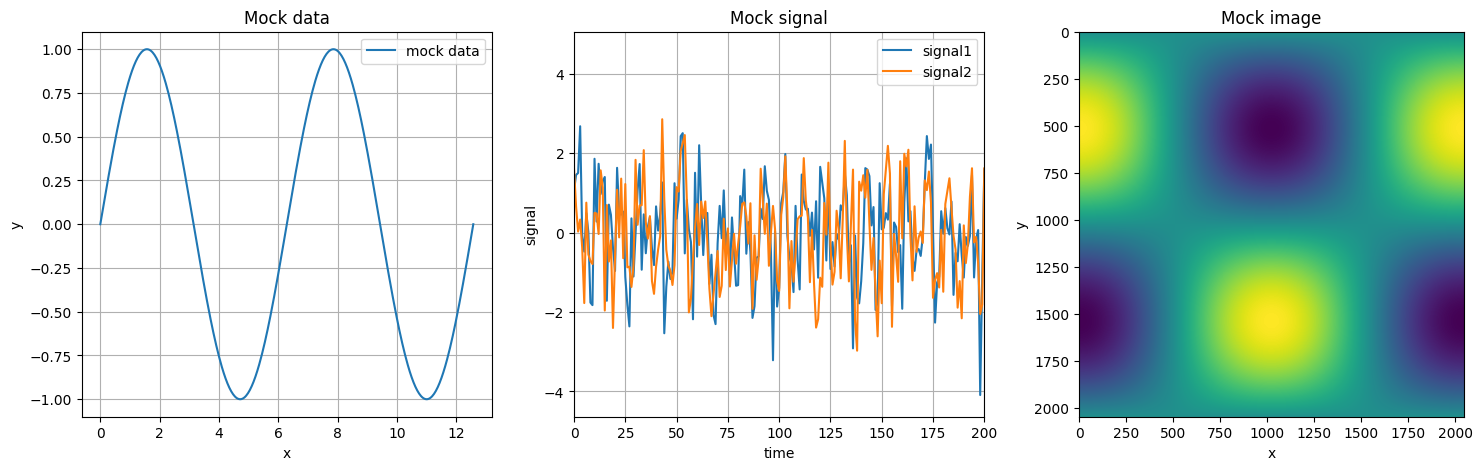

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(mock_trial['x'], mock_trial['y'], label='mock data')
axs[0].set_title('Mock data')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(mock_signal['signal1'], label='signal1')
axs[1].plot(mock_signal['signal2'], label='signal2')
axs[1].set_xlim(0, 200)
axs[1].set_title('Mock signal')
axs[1].set_xlabel('time')
axs[1].set_ylabel('signal')
axs[1].legend()
axs[1].grid(True)

im = axs[2].imshow(mock_img)
axs[2].set_title('Mock image')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
# fig.colorbar(im, ax=axs[2], label='Interactive colorbar')

plt.show()